In [1]:
# 1. Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Load the dataset
data_path = r'C:\Users\ashis\Downloads\data for ironheck\Untitled spreadsheet - HumanResources[1].csv'
df = pd.read_csv(data_path)

df.head()

,Employee_ID,First Name,Last Name,Gender,State,City,Education Level,Birthdate,Hiredate,Termdate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,00-95822412,Danielle,Johnson,Female,New York,New York City,High School,13/02/1980,16/04/2016,05/07/2021,...,1,80,0,8,0,1,6,4,0,5
1,00-42868828,John,Taylor,Male,North Carolina,Charlotte,Bachelor,22/09/1987,09/02/2017,14/06/2019,...,4,80,1,10,3,3,10,7,1,7
2,00-83197857,Erica,Mcclain,Male,New York,New York City,Bachelor,19/05/1994,03/02/2016,06/03/2021,...,2,80,0,7,3,3,0,0,0,0
3,00-13999315,Brittany,Johnson,Male,New York,New York City,Bachelor,18/04/1980,06/02/2016,06/11/2018,...,3,80,0,8,3,3,8,7,3,0
4,00-90801586,Jeffery,Wagner,Female,New York,New York City,Bachelor,07/04/1985,11/01/2015,NaN,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Step 3: Basic Data Exploration and Cleaning
# Check for missing values
print(df.isnull().sum())
df = df.dropna() 

Employee_ID                   0
First Name                    0
Last Name                     0
Gender                        0
State                         0
City                          0
Education Level               0
Birthdate                     0
Hiredate                      0
Termdate                    504
Department                    0
Job Title                     0
Salary                        0
Performance Rating            0
Age                           0
Attrition                     0
BusinessTravel                0
DailyRate                     0
DistanceFromHome              0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobSatisfaction               0
MaritalStatus                 0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
Relation

In [14]:
df = df.drop(['EmployeeID', 'Name'], axis=1, errors='ignore')


In [23]:
# Convert HireDate and TermDate to datetime, and create Tenure in years
df['Hiredate'] = pd.to_datetime(df['Hiredate'], errors='coerce')
df['Termdate'] = pd.to_datetime(df['Termdate'], errors='coerce')
df['Tenure'] = (df['Termdate'] - df['Hiredate']).dt.days / 365.25


In [16]:
print(df.columns)


Index(['Employee_ID', 'First Name', 'Last Name', 'Gender', 'State', 'City',
       'Education Level', 'Birthdate', 'Hiredate', 'Termdate', 'Department',
       'Job Title', 'Salary', 'Performance Rating', 'Age', 'Attrition',
       'BusinessTravel', 'DailyRate', 'DistanceFromHome', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MaritalStatus',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [29]:
# 4.Encode Categorical Variables
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Department', 'Job Title', 'MaritalStatus']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
df.head()


,Employee_ID,First Name,Last Name,Gender,State,City,Education Level,Birthdate,Hiredate,Termdate,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Tenure
0,00-95822412,Danielle,Johnson,0,New York,New York City,High School,13/02/1980,2016-04-16,2021-05-07,...,80,0,8,0,1,6,4,0,5,5.056810
1,00-42868828,John,Taylor,1,North Carolina,Charlotte,Bachelor,22/09/1987,2017-09-02,2019-06-14,...,80,1,10,3,3,10,7,1,7,1.779603
2,00-83197857,Erica,Mcclain,1,New York,New York City,Bachelor,19/05/1994,2016-03-02,2021-06-03,...,80,0,7,3,3,0,0,0,0,5.253936
3,00-13999315,Brittany,Johnson,1,New York,New York City,Bachelor,18/04/1980,2016-06-02,2018-06-11,...,80,0,8,3,3,8,7,3,0,2.023272
4,00-90801586,Jeffery,Wagner,0,New York,New York City,Bachelor,07/04/1985,2015-11-01,NaT,...,80,1,6,3,3,2,2,2,2,NaN


# Step 4: Exploratory Data Analysis (EDA)
    

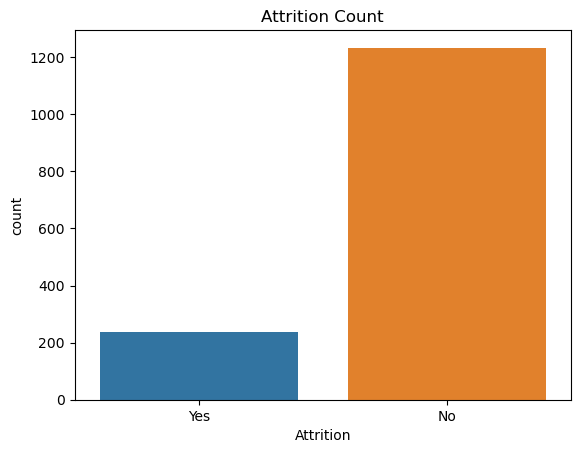

In [26]:
# 1.Plot Attrition Rate
sns.countplot(x='Attrition', data=df)
plt.title("Attrition Count")
plt.show()


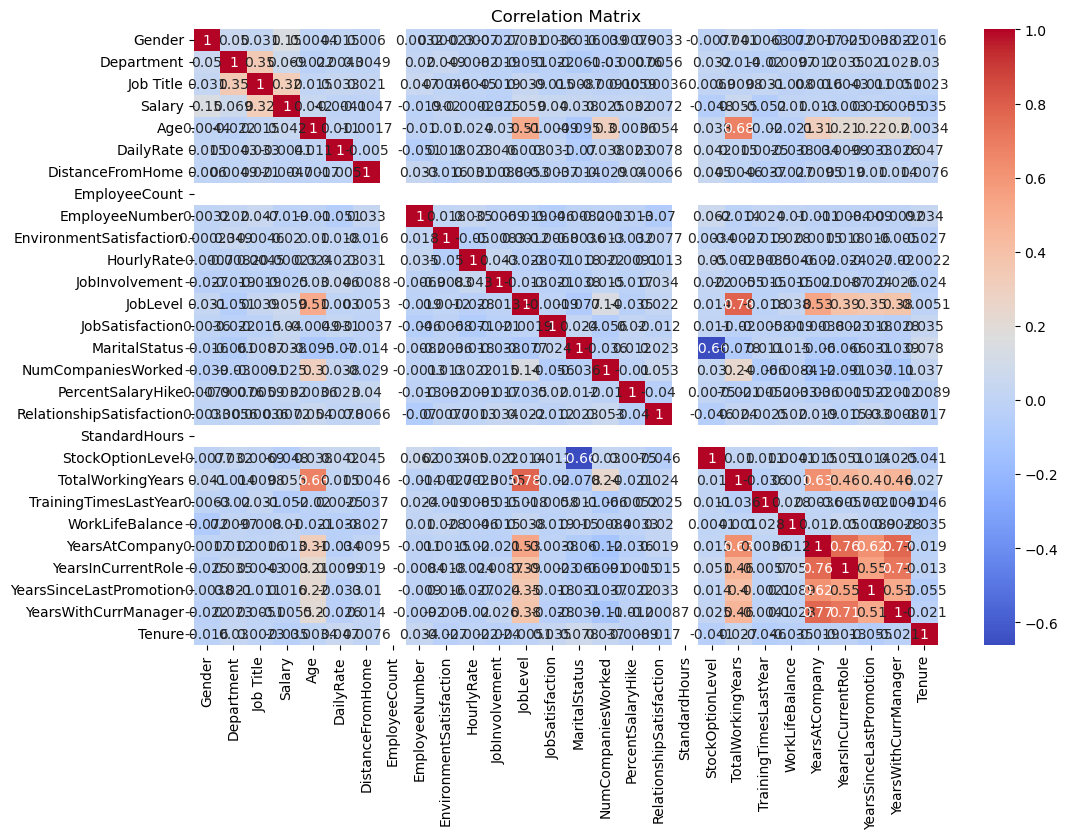

In [27]:
# 2.Correlation Matrix:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


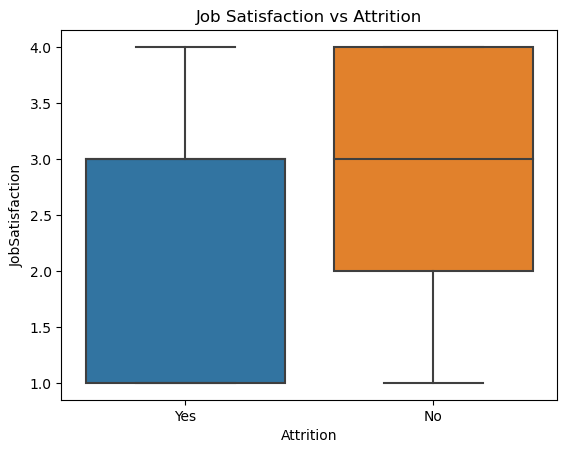

In [28]:
# 3. Analyze Attrition by Key Features:
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df)
plt.title("Job Satisfaction vs Attrition")
plt.show()


In [31]:
# 5. Define Features and Target Variable, and Split the Data
X = df.drop(['Attrition', 'Hiredate', 'Termdate'], axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
print("Data types of columns:")
print(X_train.dtypes)

non_numeric_columns = X_train.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns)

X_train_numeric = X_train.select_dtypes(include=[np.number])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)  
print("Scaled features shape:", X_train_scaled.shape)


Data types of columns:
Employee_ID                  object
First Name                   object
Last Name                    object
Gender                        int64
State                        object
City                         object
Education Level              object
Birthdate                    object
Department                    int64
Job Title                     int64
Salary                        int64
Performance Rating           object
Age                           int64
BusinessTravel               object
DailyRate                     int64
DistanceFromHome              int64
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobSatisfaction               int64
MaritalStatus                 int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
Perce

In [40]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numeric columns to scale:")
print(numeric_cols)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:")
print(categorical_cols)

X_train = df[numeric_cols].copy()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

print("Scaled features shape:", X_train_scaled.shape)


Original DataFrame Columns:
Index(['Employee_ID', 'First Name', 'Last Name', 'Gender', 'State', 'City',
       'Education Level', 'Birthdate', 'Hiredate', 'Termdate', 'Department',
       'Job Title', 'Salary', 'Performance Rating', 'Age', 'Attrition',
       'BusinessTravel', 'DailyRate', 'DistanceFromHome', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MaritalStatus',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Tenure'],
      dtype='object')
Numeric columns to scale:
['Gender', 'Department', 'Job Title', 'Salary', 'Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Ho

In [41]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
X_numeric = df[numeric_cols].copy()

scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
X_categorical = pd.get_dummies(df[categorical_cols], drop_first=True)

X_final = pd.concat([pd.DataFrame(X_numeric_scaled, columns=numeric_cols), X_categorical.reset_index(drop=True)], axis=1)

print("Final feature set shape:", X_final.shape)


Final feature set shape: (1470, 3968)


In [43]:
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (1176, 3968)
Testing set shape: (294, 3968)


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Define features and target variable
X = df.drop(columns=['Attrition'])  # Adjust 'Attrition' as necessary
y = df['Attrition']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select only numeric columns for scaling
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Scale the numeric features only
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Now you can proceed with your modeling using X_train, X_test, y_train, y_test


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data_path = r'C:\Users\ashis\Downloads\data for ironheck\Untitled spreadsheet - HumanResources[1].csv'

X = df.drop(columns=['Attrition']) 
y = df['Attrition'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numeric columns:", numeric_cols)

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])



Numeric columns: ['Gender', 'Department', 'Job Title', 'Salary', 'Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Tenure']


In [ ]:
#X_train = X_train.drop(columns=['Last Name'])
X_train = X_train.drop(columns=['City'])

In [65]:
print(X_train.columns.tolist())


['Gender', 'State', 'Education Level', 'Birthdate', 'Hiredate', 'Termdate', 'Department', 'Job Title', 'Salary', 'Performance Rating', 'Age', 'BusinessTravel', 'DailyRate', 'DistanceFromHome', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Tenure']


In [66]:
# Scale features
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training set
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Transform the test set (assumes you have already created X_test)
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


In [73]:
# Check for NaN values in the entire DataFrame
print("Checking for NaN values in the entire DataFrame:")
print(df.isnull().sum())


Checking for NaN values in the entire DataFrame:
Employee_ID                 0
First Name                  0
Last Name                   0
Gender                      0
State                       0
City                        0
Education Level             0
Birthdate                   0
Hiredate                    0
Termdate                    0
Department                  0
Job Title                   0
Salary                      0
Performance Rating          0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
DistanceFromHome            0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
MaritalStatus               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
RelationshipSatisfact

In [74]:
# Check the data types of each feature in X_train
print("Data types of features in X_train:")
print(X_train.dtypes)


Data types of features in X_train:
Gender                             float64
State                               object
Education Level                     object
Birthdate                           object
Hiredate                    datetime64[ns]
Termdate                    datetime64[ns]
Department                         float64
Job Title                          float64
Salary                             float64
Performance Rating                  object
Age                                float64
BusinessTravel                      object
DailyRate                          float64
DistanceFromHome                   float64
EmployeeCount                      float64
EmployeeNumber                     float64
EnvironmentSatisfaction            float64
HourlyRate                         float64
JobInvolvement                     float64
JobLevel                           float64
JobSatisfaction                    float64
MaritalStatus                      float64
NumCompaniesWorked 

In [75]:
# Step 1: Encode Categorical Features

# List of categorical columns
categorical_columns = ['State', 'Education Level', 'Performance Rating', 'BusinessTravel', 'Over18', 'OverTime']

# Create a label encoder object
label_encoder = LabelEncoder()

# Encode categorical features
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str)) 


In [76]:
# Drop unnecessary columns
df.drop(['Birthdate', 'Hiredate', 'Termdate'], axis=1, inplace=True)


In [77]:
# Check data types again
print("Data types of features in df after processing:")
print(df.dtypes)


Data types of features in df after processing:
Employee_ID                  object
First Name                   object
Last Name                    object
Gender                        int64
State                         int32
City                         object
Education Level               int32
Department                    int64
Job Title                     int64
Salary                        int64
Performance Rating            int32
Age                           int64
Attrition                    object
BusinessTravel                int32
DailyRate                     int64
DistanceFromHome              int64
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobSatisfaction               int64
MaritalStatus                 int64
NumCompaniesWorked            int64
Over18                        int32
OverTime         

In [28]:
# Prepare features and target variable
X = df.drop('Attrition', axis=1)  # Drop the target variable
y = df['Attrition']  # Target variable


In [ ]:
Example Workflow for an HR Attrition Project
Define the Problem: Predict whether an employee will leave the company.
Collect Data: Obtain HR data containing employee details and attrition information.
EDA: Analyze the data for patterns, visualizing attrition rates by department, age, etc.
Data Cleaning: Handle missing values, remove duplicates, and correct data types.
Feature Engineering: Create a tenure feature from hire date, and encode categorical variables.
Data Preprocessing: Split the dataset into training and test sets, and scale the features.
Model Selection: Choose Logistic Regression and Random Forest as potential models.
Model Training: Train the models and tune hyperparameters.
Model Evaluation: Evaluate using metrics like accuracy and F1 score.
Model Deployment: Deploy the model to make predictions on new employee data.
Documentation and Reporting: Document findings and present results to HR management.
Iteration: Gather feedback and refine the model as necessary.

In [80]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Display the results
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

# Optional: Create separate DataFrames for numerical and categorical data
numerical_df = df[numerical_columns]
categorical_df = df[categorical_columns]


Numerical Columns: Index(['Gender', 'Department', 'Job Title', 'Salary', 'Age', 'DailyRate',
       'DistanceFromHome', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Tenure'],
      dtype='object')
Categorical Columns: Index(['Employee_ID', 'First Name', 'Last Name', 'City', 'Attrition'], dtype='object')


In [4]:
X = df.drop('Attrition', axis=1) 
y = df['Attrition']
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
print(X.shape)

(966, 40)


In [11]:
df = df.drop(['Employee_ID', 'First Name', 'Last Name'], axis=1, errors='ignore')
label_encoder = LabelEncoder()
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])  
df = pd.get_dummies(df, columns=['City'], drop_first=True)
df.head()


,Gender,State,Education Level,Birthdate,Hiredate,Termdate,Department,Job Title,Salary,Performance Rating,...,City_Morgantown,City_Naperville,City_New York City,City_Norfolk,City_Philadelphia,City_Pittsburgh,City_Raleigh,City_Richmond,City_Virginia Beach,City_Warren
0,Female,New York,High School,13/02/1980,16/04/2016,05/07/2021,Customer Service,Help Desk Technician,81552,Needs Improvement,...,0,0,1,0,0,0,0,0,0,0
1,Male,North Carolina,Bachelor,22/09/1987,09/02/2017,14/06/2019,IT,System Administrator,107520,Good,...,0,0,0,0,0,0,0,0,0,0
2,Male,New York,Bachelor,19/05/1994,03/02/2016,06/03/2021,Operations,Logistics Coordinator,61104,Good,...,0,0,1,0,0,0,0,0,0,0
3,Male,New York,Bachelor,18/04/1980,06/02/2016,06/11/2018,Operations,Inventory Specialist,73770,Good,...,0,0,1,0,0,0,0,0,0,0
4,Female,New York,Bachelor,07/04/1985,11/01/2015,NaN,Operations,Operations Analyst,55581,Satisfactory,...,0,0,1,0,0,0,0,0,0,0


In [13]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns identified:", categorical_columns)


Categorical columns identified: ['Employee_ID', 'First Name', 'Last Name', 'Gender', 'State', 'City', 'Education Level', 'Birthdate', 'Hiredate', 'Termdate', 'Department', 'Job Title', 'Performance Rating', 'Attrition', 'BusinessTravel', 'MaritalStatus', 'Over18', 'OverTime']


In [16]:
columns_to_drop = ['Employee_ID', 'First Name', 'Last Name']
df = df.drop(columns=columns_to_drop, errors='ignore')
print(df.columns)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
df_dummies = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df_dummies.head()



Index(['Gender', 'State', 'City', 'Education Level', 'Birthdate', 'Hiredate',
       'Termdate', 'Department', 'Job Title', 'Salary', 'Performance Rating',
       'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'DistanceFromHome',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MaritalStatus', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


,Salary,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,Job Title_System Administrator,Performance Rating_Good,Performance Rating_Needs Improvement,Performance Rating_Satisfactory,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,81552,41,1102,1,1,1,2,94,3,2,...,0,0,1,0,1,0,1,0,1,1
1,107520,49,279,8,1,2,3,61,2,2,...,1,1,0,0,0,1,0,1,0,0
2,61104,37,1373,2,1,4,4,92,2,1,...,0,1,0,0,1,0,1,0,1,1
3,73770,33,1392,3,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,55581,27,591,2,1,7,1,40,3,1,...,0,0,0,1,0,0,1,1,0,0


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

target_variable = 'Attrition'
X = df.drop(target_variable, axis=1) 
y = df[target_variable] 

X = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



# Step 5: Train the models


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)
logistic_predictions = logistic_model.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, logistic_predictions))


Random Forest Classification Report:
              precision    recall  f1-score   support

          No       0.87      1.00      0.93       255
         Yes       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294

Logistic Regression Classification Report:
              precision    recall  f1-score   support

          No       0.87      1.00      0.93       255
         Yes       0.00      0.00      0.00        39

    accuracy                           0.86       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.86      0.80       294

Random Forest Confusion Matrix:
[[255   0]
 [ 39   0]]
Logistic Regression Confusion Matrix:
[[254   1]
 [ 39   0]]


In [31]:
pip install imbalanced-learn



     -------------------------------------- 258.3/258.3 kB 1.6 MB/s eta 0:00:00
     -------------------------------------- 301.8/301.8 kB 1.4 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [32]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

#ros = RandomOverSampler(random_state=42)
#X_resampled, y_resampled = ros.fit_resample(X, y)
#print(pd.Series(y_resampled).value_counts())


Yes    1233
No     1233
Name: Attrition, dtype: int64


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.2, 
                                                    random_state=42)

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
print(pd.Series(y_resampled).value_counts())

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


No     978
Yes    978
Name: Attrition, dtype: int64
Random Forest Classification Report:
              precision    recall  f1-score   support

          No       0.88      0.99      0.93       255
         Yes       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294

Random Forest Confusion Matrix:
[[253   2]
 [ 35   4]]


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, 
                                                    test_size=0.2, 
                                                    random_state=42)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

          No       0.72      0.65      0.68       206
         Yes       0.65      0.72      0.68       186

    accuracy                           0.68       392
   macro avg       0.68      0.68      0.68       392
weighted avg       0.68      0.68      0.68       392

Logistic Regression Confusion Matrix:
[[134  72]
 [ 53 133]]
